In [2]:
from concurrent.futures import ProcessPoolExecutor
from pathlib import Path
import cv2
import re
from tqdm import tqdm
import cv2
import numpy as np
from pathlib import Path
from scipy import signal
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import shutil
from itertools import repeat
import subprocess
import sys
import os
import cv2
from joblib import Parallel, delayed

In [53]:
# Load sample image

impath = "/mnt/upramdya_data/MD/Pictures/image82080.jpg"


img = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

In [54]:

X1 = 90
X2 = 620
X3 = 1590
X4 = 2110
X5 = 3080
X6 = 3600

Y1 = 30
Y2 = 600
Y3 = 1170
Y4 = 1750
Y5 = 2370
Y6 = 2900

regions_of_interest = [
    (X1, Y1, X2, Y2),
    (X3, Y1, X4, Y2),
    (X5, Y1, X6, Y2),
    (X1, Y3, X2, Y4),
    (X3, Y3, X4, Y4),
    (X5, Y3, X6, Y4),
    (X1, Y5, X2, Y6),
    (X3, Y5, X4, Y6),
    (X5, Y5, X6, Y6),
]

# Crop the arenas :

regions = []

for j, region in enumerate(regions_of_interest):


        # Crop the image
        x1, y1, x2, y2 = region
        width = x2 - x1
        height = y2 - y1

        # Adjust the width and height to be multiples of 2
        if width % 2 != 0:
            width -= 1
        if height % 2 != 0:
            height -= 1

        cropped_image = img[y1 : y1 + height, x1 : x1 + width]
        
        regions.append(cropped_image)
        

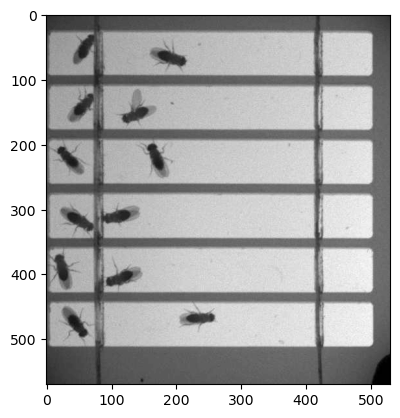

In [55]:
# display the first

plt.imshow(regions[0], cmap="gray")

In [56]:
# Compute adaptive thresholding

def compute_adaptive_thresholding(image, block_size=51, c=2):
    
    # Apply adaptive thresholding
    return cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c
    )
    



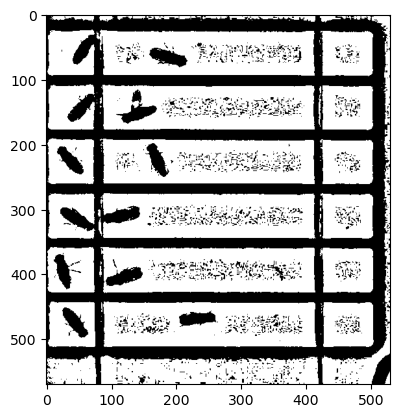

In [57]:
trsh = regions[0].copy()

trsh = compute_adaptive_thresholding(regions[0], block_size=41, c=2)

plt.imshow(trsh, cmap="gray")

In [58]:
# Find the contours

def find_contours(image):
    
    # Find the contours
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours



In [59]:
contours = find_contours(trsh)

In [60]:
# Draw the contours

def draw_contours(image, contours):
    
    # Draw the contours
    return cv2.drawContours(image, contours, -1, (0, 255, 0), 3)



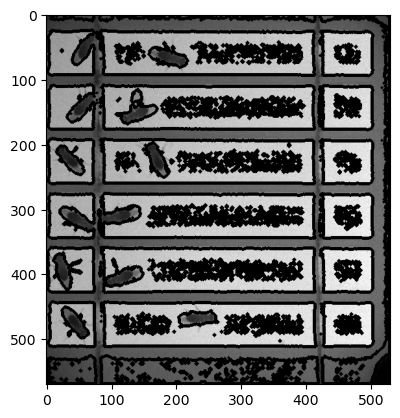

In [61]:
contours_image = regions[0].copy()

contours_image = draw_contours(regions[0], contours)

plt.imshow(contours_image, cmap="gray")

In [62]:
# Identify the 6 rectangles

def identify_rectangles(contours, min_area=1000, max_area=10000):
    
    # Identify the rectangles
    rectangles = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            rectangles.append(contour)
            
    return rectangles



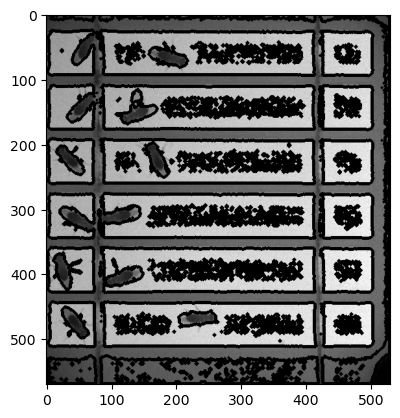

In [63]:
rectangles = identify_rectangles(contours)

rectangles_image = regions[0].copy()

rectangles_image = draw_contours(regions[0], rectangles)

plt.imshow(rectangles_image, cmap="gray")

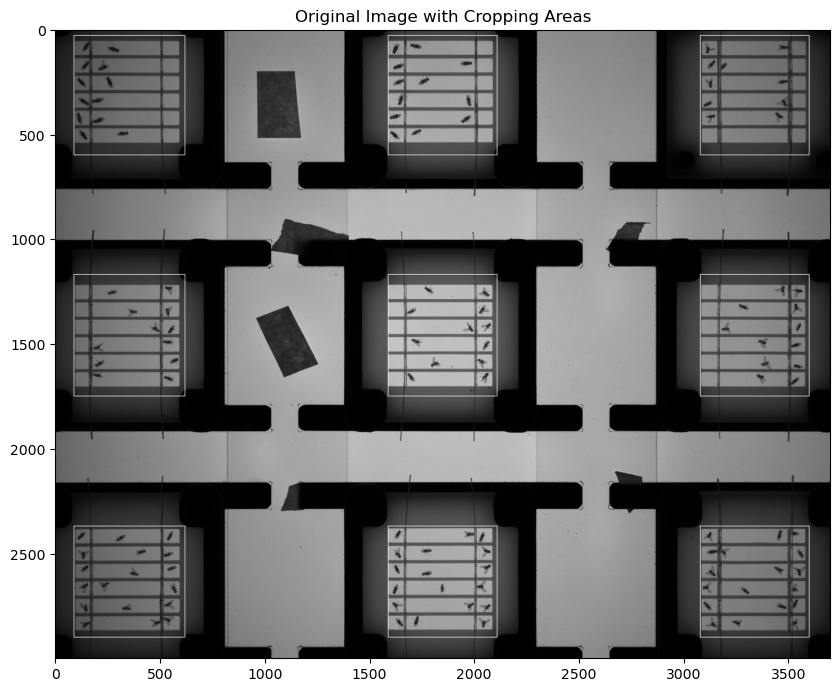

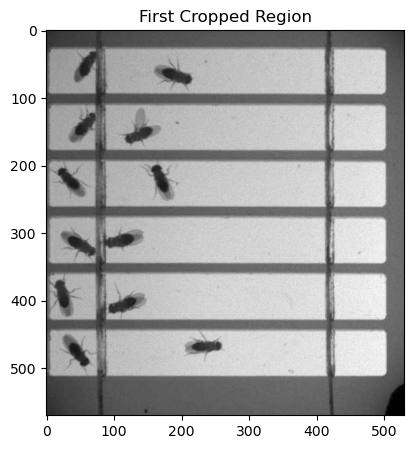

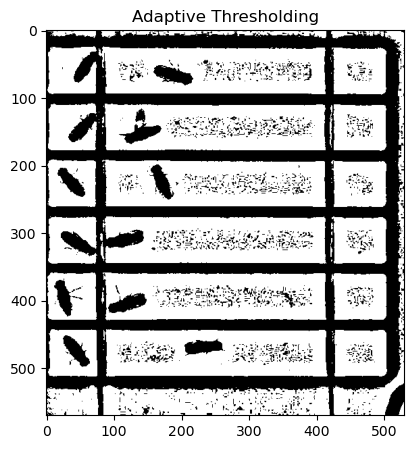

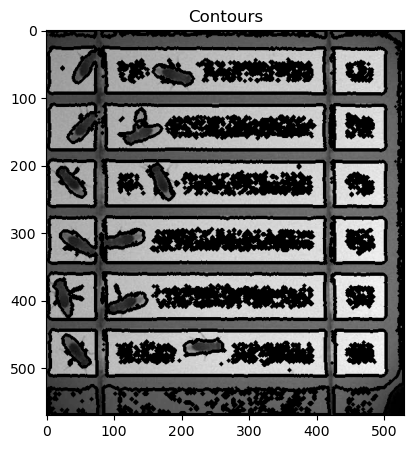

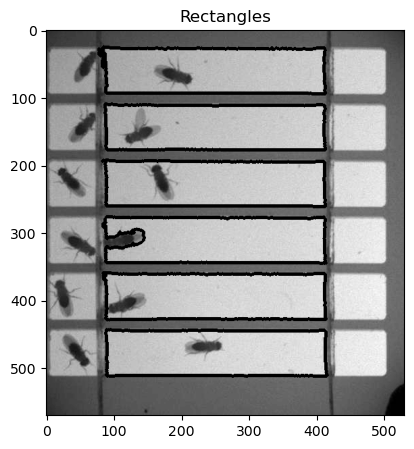

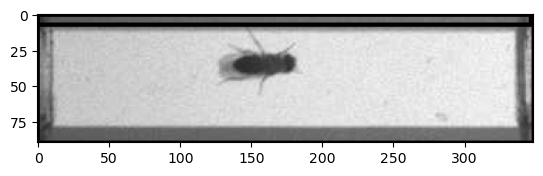

In [68]:
# Load sample image
impath = "/mnt/upramdya_data/MD/Pictures/image82080.jpg"
img = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

# Define coordinates for regions of interest
X1, X2, X3, X4, X5, X6 = 90, 620, 1590, 2110, 3080, 3600
Y1, Y2, Y3, Y4, Y5, Y6 = 30, 600, 1170, 1750, 2370, 2900

regions_of_interest = [
    (X1, Y1, X2, Y2),
    (X3, Y1, X4, Y2),
    (X5, Y1, X6, Y2),
    (X1, Y3, X2, Y4),
    (X3, Y3, X4, Y4),
    (X5, Y3, X6, Y4),
    (X1, Y5, X2, Y6),
    (X3, Y5, X4, Y6),
    (X5, Y5, X6, Y6),
]

# Create a copy of the original image to draw rectangles
img_with_rectangles = img.copy()

# Draw rectangles on the copy of the original image
for region in regions_of_interest:
    x1, y1, x2, y2 = region
    cv2.rectangle(img_with_rectangles, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with rectangles
plt.figure(figsize=(10, 10))
plt.imshow(img_with_rectangles, cmap="gray")
plt.title("Original Image with Cropping Areas")
plt.show()

# Crop the arenas
regions = []
for region in regions_of_interest:
    x1, y1, x2, y2 = region
    width = x2 - x1
    height = y2 - y1

    # Adjust the width and height to be multiples of 2
    if width % 2 != 0:
        width -= 1
    if height % 2 != 0:
        height -= 1

    cropped_image = img[y1 : y1 + height, x1 : x1 + width]
    regions.append(cropped_image)

# Display the first cropped region
plt.figure(figsize=(5, 5))
plt.imshow(regions[0], cmap="gray")
plt.title("First Cropped Region")
plt.show()

# Compute adaptive thresholding
def compute_adaptive_thresholding(image, block_size=51, c=2):
    return cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c
    )

trsh = compute_adaptive_thresholding(regions[0], block_size=41, c=2)

plt.figure(figsize=(5, 5))
plt.imshow(trsh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.show()

# Find the contours
def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contours(trsh)

# Draw the contours
def draw_contours(image, contours):
    image_with_contours = image.copy()
    return cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

contours_image = draw_contours(regions[0], contours)

plt.figure(figsize=(5, 5))
plt.imshow(contours_image, cmap="gray")
plt.title("Contours")
plt.show()

# Identify the rectangles
def identify_rectangles(contours, min_area=20000, max_area=35000):
    rectangles = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            rectangles.append(contour)
    return rectangles

rectangles = identify_rectangles(contours)

rectangles_image = draw_contours(regions[0], rectangles)

plt.figure(figsize=(5, 5))
plt.imshow(rectangles_image, cmap="gray")
plt.title("Rectangles")
plt.show()


# Now we take the rectangles, and draw a bounding box around them with a bit of padding

def draw_bounding_boxes(image, rectangles, padding=10):
    
    # Draw bounding boxes
    for rectangle in rectangles:
        x, y, w, h = cv2.boundingRect(rectangle)
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
    return image


# And now we can produce subcrops of the rectangles

def subcrop(image, rectangles, padding=10):
    
    # Subcrop the rectangles
    subcrops = []
    for rectangle in rectangles:
        x, y, w, h = cv2.boundingRect(rectangle)
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding
        subcrop = image[y : y + h, x : x + w]
        subcrops.append(subcrop)
        
    return subcrops


# Draw bounding boxes

bounding_boxes_image = regions[0].copy()

bounding_boxes_image = draw_bounding_boxes(regions[0], rectangles)

plt.imshow(bounding_boxes_image, cmap="gray")

# Subcrop the rectangles

subcrops = subcrop(regions[0], rectangles)

# Display the first subcrop

plt.imshow(subcrops[0], cmap="gray")

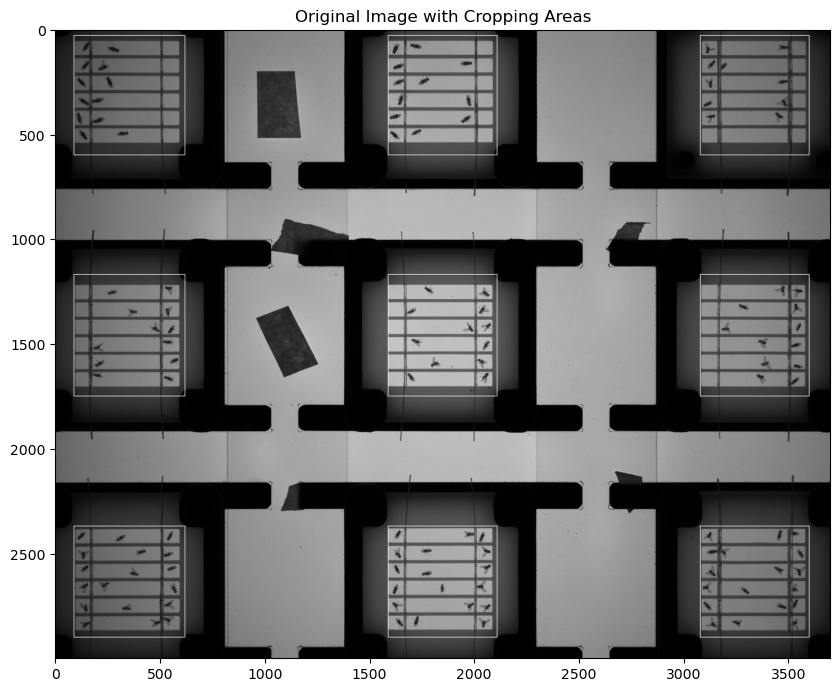

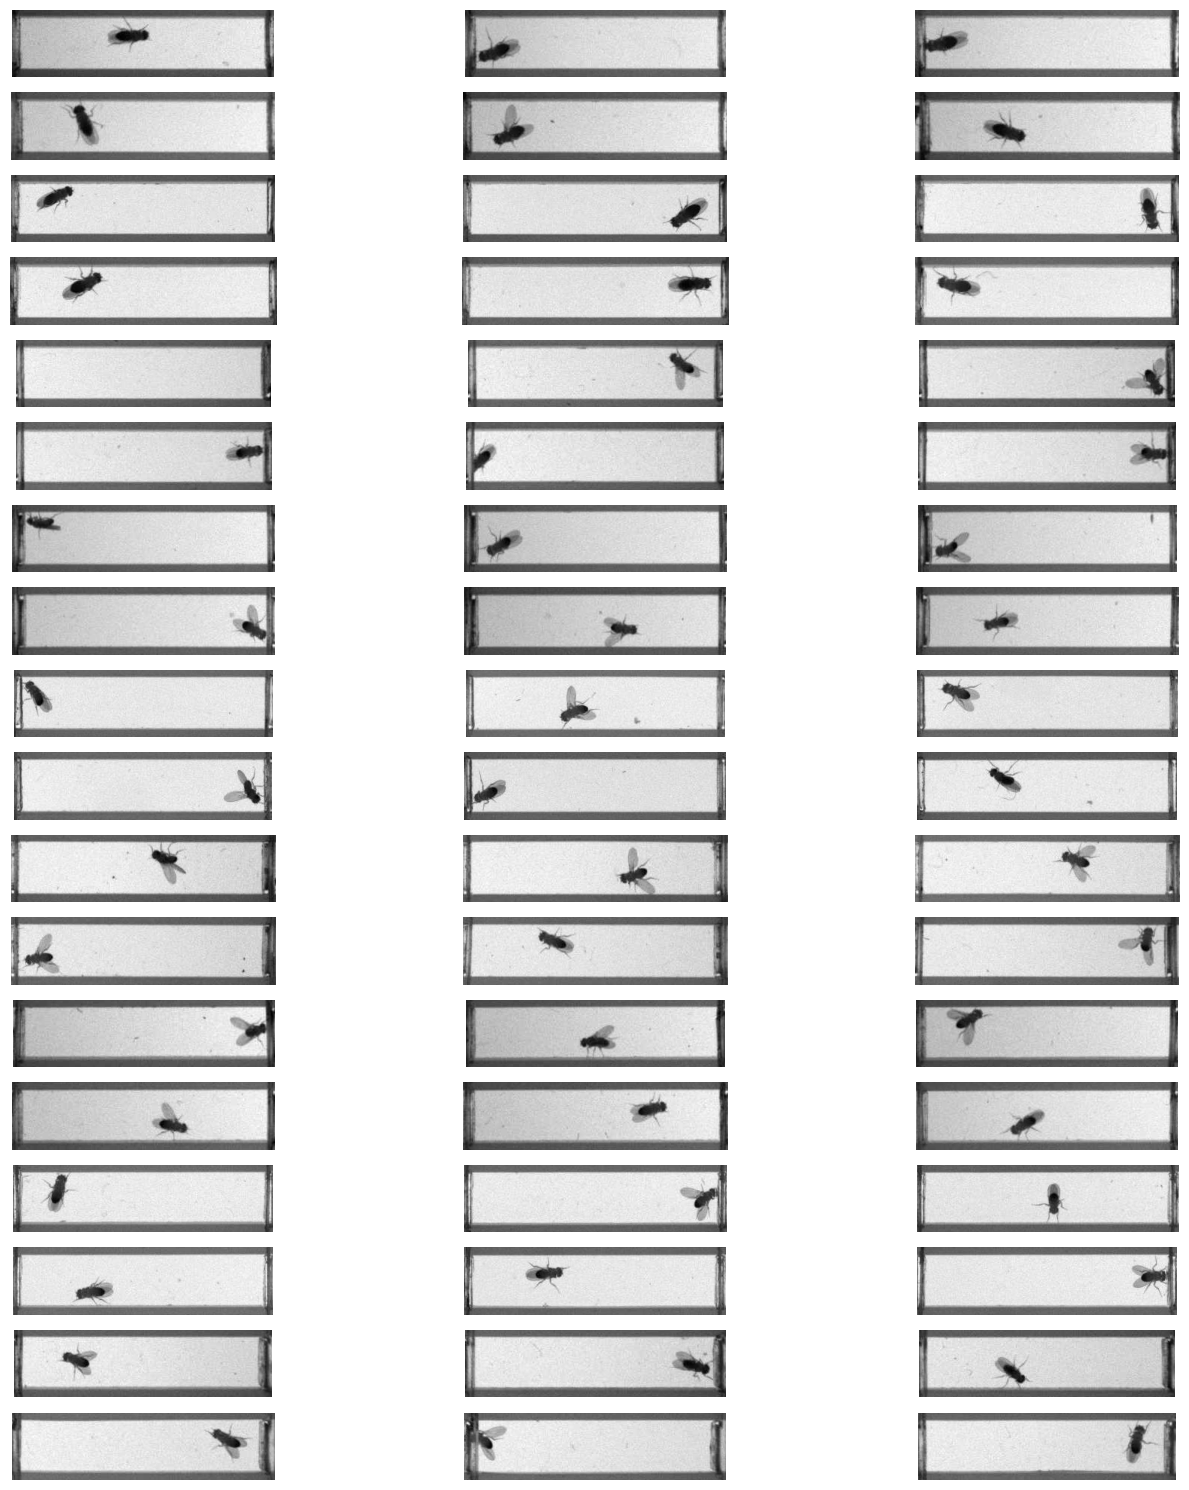

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import math

# Load sample image
impath = "/mnt/upramdya_data/MD/Pictures/image82080.jpg"
img = cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

# Define coordinates for regions of interest
X1, X2, X3, X4, X5, X6 = 90, 620, 1590, 2110, 3080, 3600
Y1, Y2, Y3, Y4, Y5, Y6 = 30, 600, 1170, 1750, 2370, 2900

regions_of_interest = [
    (X1, Y1, X2, Y2),
    (X3, Y1, X4, Y2),
    (X5, Y1, X6, Y2),
    (X1, Y3, X2, Y4),
    (X3, Y3, X4, Y4),
    (X5, Y3, X6, Y4),
    (X1, Y5, X2, Y6),
    (X3, Y5, X4, Y6),
    (X5, Y5, X6, Y6),
]

# Create a copy of the original image to draw rectangles
img_with_rectangles = img.copy()

# Draw rectangles on the copy of the original image
for region in regions_of_interest:
    x1, y1, x2, y2 = region
    cv2.rectangle(img_with_rectangles, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the original image with rectangles
plt.figure(figsize=(10, 10))
plt.imshow(img_with_rectangles, cmap="gray")
plt.title("Original Image with Cropping Areas")
plt.show()

# Crop the arenas
regions = []
for region in regions_of_interest:
    x1, y1, x2, y2 = region
    width = x2 - x1
    height = y2 - y1

    # Adjust the width and height to be multiples of 2
    if width % 2 != 0:
        width -= 1
    if height % 2 != 0:
        height -= 1

    cropped_image = img[y1 : y1 + height, x1 : x1 + width]
    regions.append(cropped_image)

# Function to compute adaptive thresholding
def compute_adaptive_thresholding(image, block_size=51, c=2):
    return cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c
    )

# Function to find contours
def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

# Function to draw contours
def draw_contours(image, contours):
    image_with_contours = image.copy()
    return cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

# Function to identify rectangles
def identify_rectangles(contours, min_area=15000, max_area=35000):
    rectangles = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            rectangles.append(contour)
    return rectangles

# Function to draw bounding boxes
def draw_bounding_boxes(image, rectangles, padding=10):
    image_with_boxes = image.copy()
    for rectangle in rectangles:
        x, y, w, h = cv2.boundingRect(rectangle)
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding
        image_with_boxes = cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return image_with_boxes

# Function to subcrop rectangles
def subcrop(image, rectangles, padding=10):
    subcrops = []
    for rectangle in rectangles:
        x, y, w, h = cv2.boundingRect(rectangle)
        x -= padding
        y -= padding
        w += 2 * padding
        h += 2 * padding
        subcrop = image[y : y + h, x : x + w]
        subcrops.append(subcrop)
    return subcrops

# Process each region and display the subcrops in a grid
all_subcrops = []
for region in regions:
    # Compute adaptive thresholding
    trsh = compute_adaptive_thresholding(region, block_size=41, c=2)
    
    # Find contours
    contours = find_contours(trsh)
    
    # Identify rectangles
    rectangles = identify_rectangles(contours)
    
    # Subcrop the rectangles
    subcrops = subcrop(region, rectangles)
    all_subcrops.extend(subcrops)

# Display all subcrops in a grid
n_subcrops = len(all_subcrops)
n_cols = 3
n_rows = math.ceil(n_subcrops / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i, subcrop in enumerate(all_subcrops):
    axes[i].imshow(subcrop, cmap="gray")
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [73]:
18*3

54